Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains one of the top
causes of deaths in the US.The Heart Disease and Stroke Statistics—2019 Update from the **American Heart Association** indicates that:
* 116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.
* On average, someone dies of Cardiovascular disease(CVD) every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.
* On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data.

In this notebook i will try to unleash useful insights using this heart disease datasets and by building stacked ensemble model by combining the power of best performing machine learning algorithms.

This notebook is divided into 13 major steps which are as follows:

1. [Data description](#data-desc)
2. [Importing Libraries & setting up environment](#imp-lib)
3. [Loading dataset](#data-load)
4. [Data Cleaning & Preprocessing](#data-prep)
5. [Exploratory Data Analysis](#data-eda)
6. [Outlier Detection & Removal](#data-out)
7. [Training & Test Split](#data-train)
8. [Cross Validation](#cross-val)
9. [Model Building](#data-model)
10. [Model evaluation & comparison](#model-eval)<br>
11. [Feature Selection](#model-eval)<br>
12. [Model Evaluation](#model-inter)
13. [Conclusion](#data-conc)

## Dataset Description
This dataset consist 11 features and a target variable.
**1. Age:** Patient's Age in Years<br>
**2. Sex:** Gender of Patient (Male->1,Female->0)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into: 1. Typical 2. Typical Angina 3. Non anginal pain
4 Asymptotic<br>
**4. Resting bps:** Level of Blood Pressure at resting mode in mm/HG<br>
**5. Cholestrol:** Serum Chorestrol in mg/dl<br>
**6. Fasting Blood Sugar:** Blood Sugar levels on fasting>120 mg/dl represents as 1 incase of true and 0 as false.<br>
**7. Resting ecg:** Result of electrocardiogram while at rest are represented as 3 distinct values 0: Normal 1: Abnormality in ST-T wave 2: Left Venticular Hypertrophy <br>
**8. Max Heart Rate:** Maximum heart rate achieved.<br>
**9. Exercise Angina:** Angina induced by exercise, 0 depicting NO and 1  depicting Yes.<br>
**10. Oldpeak:** Exercise indused ST-depression in comparison with the state of rest.<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise. 0-> Normal,1-> upsloping, 2->Flat, 3->Downsampling<br>
**12. Target:** It is the target variable which we have to predict. 1-> Patient is suffering from heart disease risk, 0-> Patient is normal

## Importing Libraries

In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Data wrangling and pre-processing
import pandas as pd
import numpy as np

In [4]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Train_Test Split
from sklearn.model_selection import train_test_split

In [6]:
#model Validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,matthews_corrcoef
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,fbeta_score
from sklearn import metrics

In [7]:
# Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [8]:
# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib
import sklearn
import xgboost as xgb
import keras
from scipy import stats

In [9]:
# Versions
print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))
print("Sklearn: {}".format(sklearn.__version__))
print("Matplotlib: {}".format(matplotlib.__version__))
print("Keras: {}".format(keras.__version__))


Pandas: 1.3.1
Numpy: 1.21.1
Sklearn: 0.24.2
Matplotlib: 3.3.4
Keras: 2.5.0


## Loading Dataset

In [10]:
dt=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [11]:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [12]:
#making all the 1 in one group and 0 in other group of target
dt.groupby('target').size()

target
0    561
1    629
dtype: int64

In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


# Data Cleaning and Preprocessing

In [14]:
# Renaming features/Columns to proper name
dt.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','Resting_ecg','Max_Heart_rate','exercise_induced_angina','st_depression','st_slope','target']

In [15]:
#Converting features to categorical features
dt['chest_pain_type'][dt['chest_pain_type']==1]='Typical Angina'
dt['chest_pain_type'][dt['chest_pain_type']==2]='aTypical Angina'
dt['chest_pain_type'][dt['chest_pain_type']==3]='Non Anginal Pain'
dt['chest_pain_type'][dt['chest_pain_type']==4]='Asymptotic'

In [16]:
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,1,aTypical Angina,140,289,0,0,172,0,0.0,1,0
1,49,0,Non Anginal Pain,160,180,0,0,156,0,1.0,2,1
2,37,1,aTypical Angina,130,283,0,1,98,0,0.0,1,0
3,48,0,Asymptotic,138,214,0,0,108,1,1.5,2,1
4,54,1,Non Anginal Pain,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,Typical Angina,110,264,0,0,132,0,1.2,2,1
1186,68,1,Asymptotic,144,193,1,0,141,0,3.4,2,1
1187,57,1,Asymptotic,130,131,0,0,115,1,1.2,2,1
1188,57,0,aTypical Angina,130,236,0,2,174,0,0.0,2,1


In [17]:
dt['Resting_ecg'][dt['Resting_ecg']==0]='normal'
dt['Resting_ecg'][dt['Resting_ecg']==1]='ST-T wave abnormality'
dt['Resting_ecg'][dt['Resting_ecg']==2]='Left Ventricular hypertrophy'

In [18]:
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,1,aTypical Angina,140,289,0,normal,172,0,0.0,1,0
1,49,0,Non Anginal Pain,160,180,0,normal,156,0,1.0,2,1
2,37,1,aTypical Angina,130,283,0,ST-T wave abnormality,98,0,0.0,1,0
3,48,0,Asymptotic,138,214,0,normal,108,1,1.5,2,1
4,54,1,Non Anginal Pain,150,195,0,normal,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,Typical Angina,110,264,0,normal,132,0,1.2,2,1
1186,68,1,Asymptotic,144,193,1,normal,141,0,3.4,2,1
1187,57,1,Asymptotic,130,131,0,normal,115,1,1.2,2,1
1188,57,0,aTypical Angina,130,236,0,Left Ventricular hypertrophy,174,0,0.0,2,1


In [19]:
dt['st_slope'][dt['st_slope']==1]='Upsloping'
dt['st_slope'][dt['st_slope']==2]='Flat'
dt['st_slope'][dt['st_slope']==3]='Downsloping'

In [20]:
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,1,aTypical Angina,140,289,0,normal,172,0,0.0,Upsloping,0
1,49,0,Non Anginal Pain,160,180,0,normal,156,0,1.0,Flat,1
2,37,1,aTypical Angina,130,283,0,ST-T wave abnormality,98,0,0.0,Upsloping,0
3,48,0,Asymptotic,138,214,0,normal,108,1,1.5,Flat,1
4,54,1,Non Anginal Pain,150,195,0,normal,122,0,0.0,Upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,Typical Angina,110,264,0,normal,132,0,1.2,Flat,1
1186,68,1,Asymptotic,144,193,1,normal,141,0,3.4,Flat,1
1187,57,1,Asymptotic,130,131,0,normal,115,1,1.2,Flat,1
1188,57,0,aTypical Angina,130,236,0,Left Ventricular hypertrophy,174,0,0.0,Flat,1


In [21]:
dt['sex']=dt.sex.apply(lambda x:'Male' if x==1 else 'Female')

In [22]:
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,Male,aTypical Angina,140,289,0,normal,172,0,0.0,Upsloping,0
1,49,Female,Non Anginal Pain,160,180,0,normal,156,0,1.0,Flat,1
2,37,Male,aTypical Angina,130,283,0,ST-T wave abnormality,98,0,0.0,Upsloping,0
3,48,Female,Asymptotic,138,214,0,normal,108,1,1.5,Flat,1
4,54,Male,Non Anginal Pain,150,195,0,normal,122,0,0.0,Upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,Male,Typical Angina,110,264,0,normal,132,0,1.2,Flat,1
1186,68,Male,Asymptotic,144,193,1,normal,141,0,3.4,Flat,1
1187,57,Male,Asymptotic,130,131,0,normal,115,1,1.2,Flat,1
1188,57,Female,aTypical Angina,130,236,0,Left Ventricular hypertrophy,174,0,0.0,Flat,1


In [23]:
dt['chest_pain_type'].value_counts()

Asymptotic          625
Non Anginal Pain    283
aTypical Angina     216
Typical Angina       66
Name: chest_pain_type, dtype: int64

In [24]:
dt['Resting_ecg'].value_counts()

normal                          684
Left Ventricular hypertrophy    325
ST-T wave abnormality           181
Name: Resting_ecg, dtype: int64

In [25]:
dt['st_slope'].value_counts()

Flat           582
Upsloping      526
Downsloping     81
0                1
Name: st_slope, dtype: int64

In [26]:
#Dropping row with st_slope=0
dt.drop(dt[dt.st_slope==0].index,inplace=True)

In [27]:
dt['st_slope'].value_counts()

Flat           582
Upsloping      526
Downsloping     81
Name: st_slope, dtype: int64

In [28]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,Male,aTypical Angina,140,289,0,normal,172,0,0.0,Upsloping,0
1,49,Female,Non Anginal Pain,160,180,0,normal,156,0,1.0,Flat,1
2,37,Male,aTypical Angina,130,283,0,ST-T wave abnormality,98,0,0.0,Upsloping,0
3,48,Female,Asymptotic,138,214,0,normal,108,1,1.5,Flat,1
4,54,Male,Non Anginal Pain,150,195,0,normal,122,0,0.0,Upsloping,0


In [29]:
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
Resting_ecg                0
Max_Heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

## Exploratory Data Analysis

In [30]:
dt.shape

(1189, 12)

In [31]:
dt.describe(include=[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


<AxesSubplot:xlabel='sex', ylabel='target'>

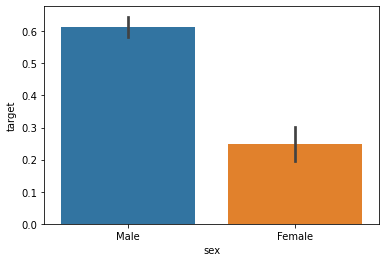

In [32]:
sns.barplot(dt['sex'],dt['target'])

<AxesSubplot:xlabel='sex', ylabel='age'>

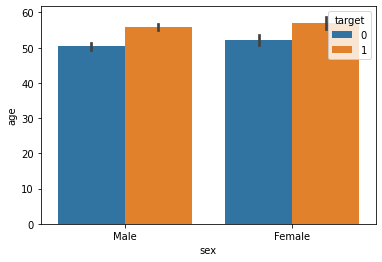

In [33]:
sns.barplot(dt['sex'],dt['age'],hue=dt['target'])

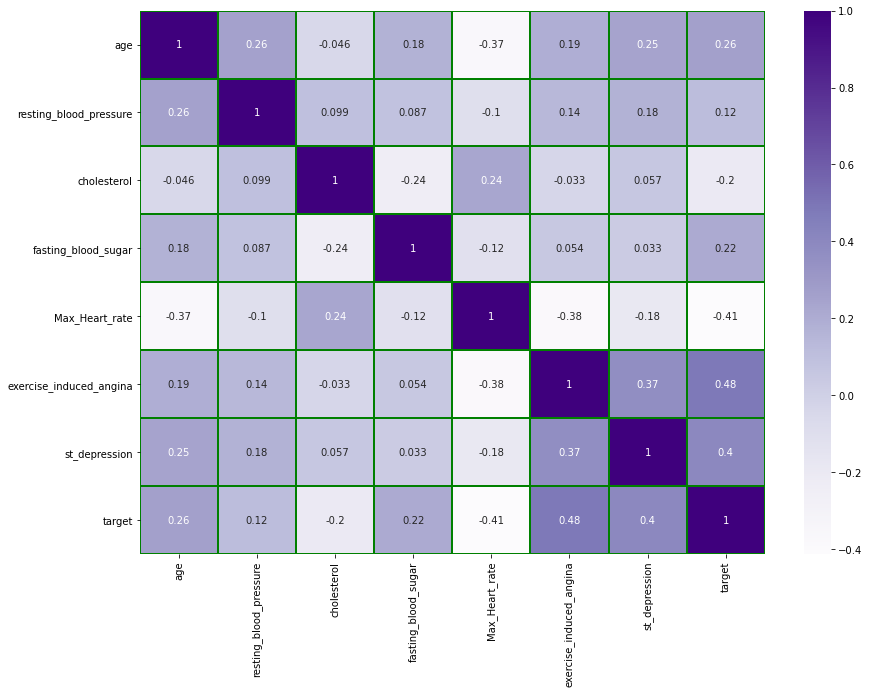

In [34]:
plt.figure(figsize=(14,10))
sns.heatmap(dt.corr(),cmap='Purples',annot=True,linecolor='Green',linewidth=1.0)
plt.show()

<AxesSubplot:xlabel='age'>

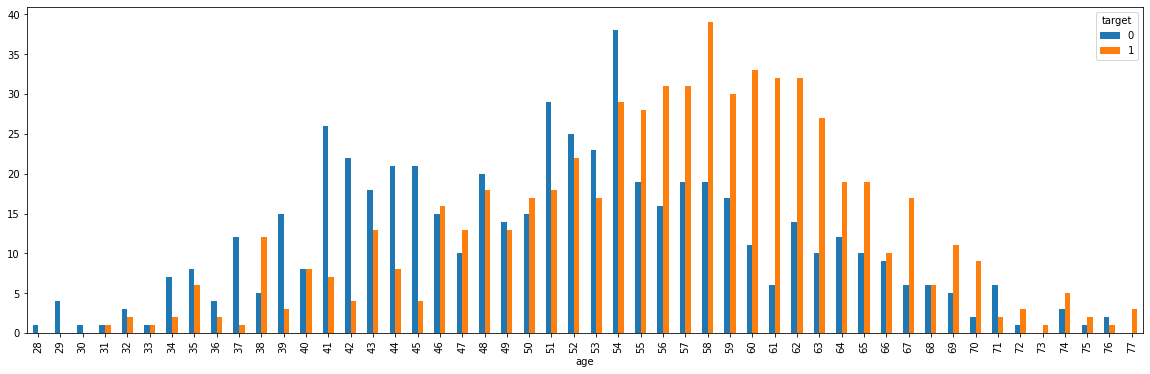

In [35]:
pd.crosstab(dt.age,dt.target).plot(kind='bar',figsize=(20,6))

In [36]:
dt.describe(include=[np.object])

,sex,chest_pain_type,Resting_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,Male,Asymptotic,normal,Flat
freq,908,625,683,582


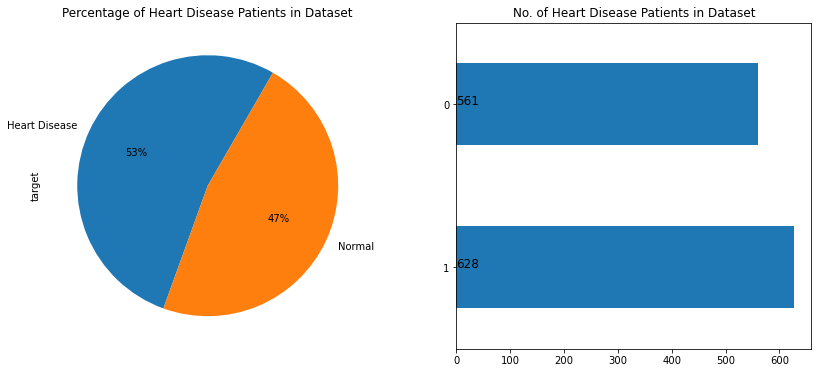

In [37]:
fig,(axis1,axis2)=plt.subplots(nrows=1,ncols=2,sharey=False,figsize=(14,6))
axis1=dt['target'].value_counts().plot.pie(x="Heart Disease",y="No. of Pateints",autopct='%1.0f%%',labels=['Heart Disease',"Normal"],startangle=60,ax=axis1)
axis1.set(title="Percentage of Heart Disease Patients in Dataset")

axis2=dt['target'].value_counts().plot(kind='barh',ax=axis2)
for i,j in enumerate(dt['target'].value_counts().values):
    axis2.text(.5,i,j,fontsize=12)
axis2.set(title="No. of Heart Disease Patients in Dataset")
plt.show()

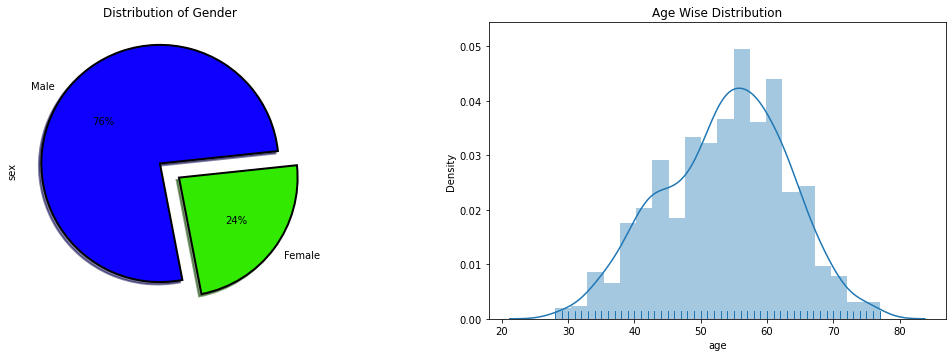

In [38]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt['sex'].value_counts().plot.pie(autopct='%1.0f%%',colors=sns.color_palette("prism",5),startangle=6,
                                 wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow=True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax=sns.distplot(dt['age'],rug=True)
plt.title("Age Wise Distribution")
plt.show()

In [39]:
attr_1=dt[dt["target"]==1]
attr_0=dt[dt["target"]==0]

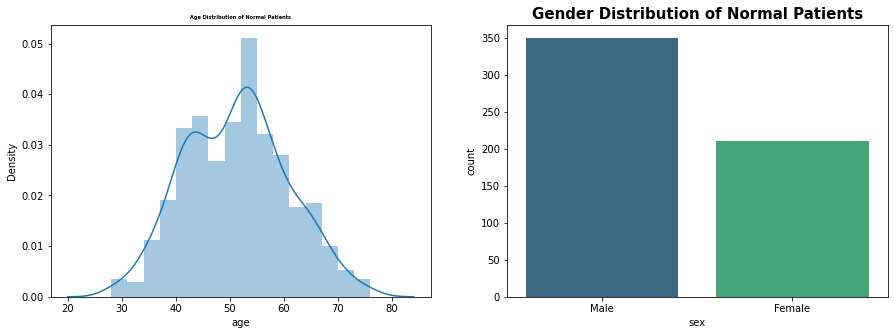

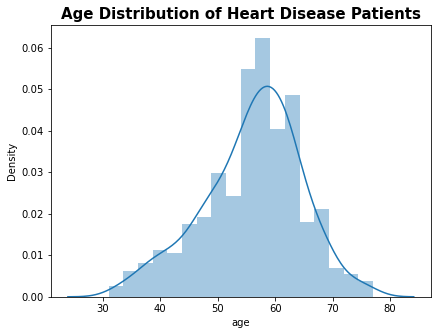

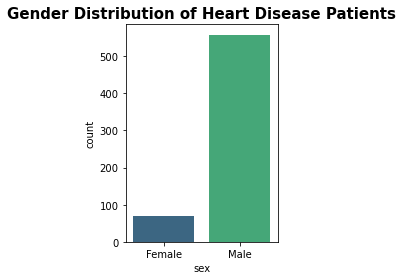

In [40]:
#Plotting normal Patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('Age Distribution of Normal Patients',fontsize=5,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'],palette='viridis')
plt.title("Gender Distribution of Normal Patients",fontsize=15,weight="bold")
plt.show()
# plotting heart patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title("Age Distribution of Heart Disease Patients",fontsize=15,weight="bold")
plt.show()

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'],palette='viridis')
plt.title("Gender Distribution of Heart Disease Patients",fontsize=15,weight="bold")
plt.show()

## Distribution of chest pain types

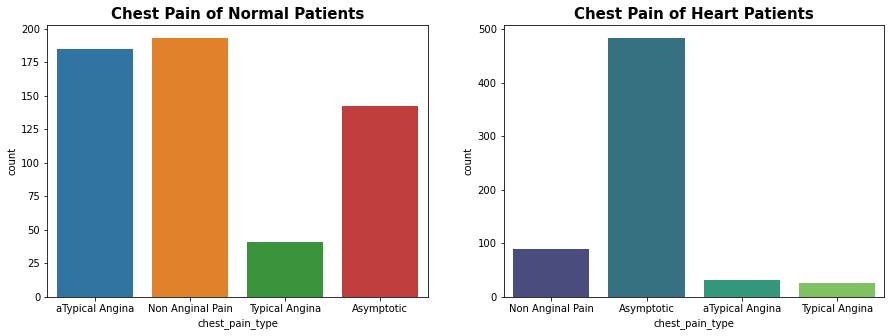

In [41]:
#Plotting normal patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('Chest Pain of Normal Patients',fontsize=15,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'],palette='viridis')
plt.title("Chest Pain of Heart Patients",fontsize=15,weight="bold")
plt.show()

In [42]:
#Exploring the Heart Disease Patients based on Chest Pain Type
plot_criteria=['chest_pain_type','target']
cm=sns.light_palette('red',as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]],dt[plot_criteria[1]],normalize='columns')*100,2))

target,0,1
chest_pain_type,,
Asymptotic,25.31,76.91
Non Anginal Pain,34.40,14.17
Typical Angina,7.31,3.98
aTypical Angina,32.98,4.94


## Distribution of Rest ECG

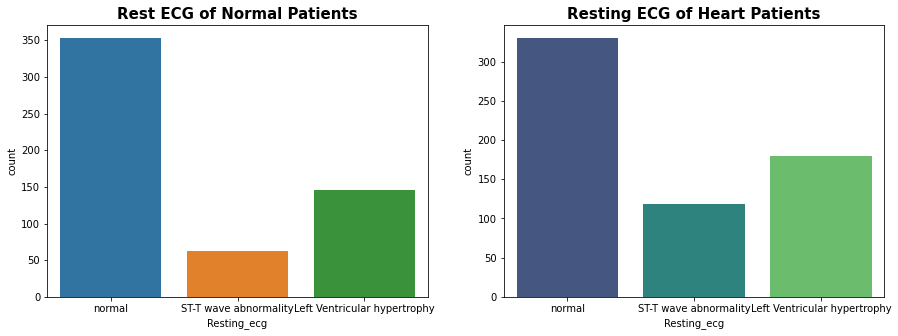

In [43]:
#Plotting normal patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['Resting_ecg'])
plt.title('Rest ECG of Normal Patients',fontsize=15,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Resting_ecg'],palette='viridis')
plt.title("Resting ECG of Heart Patients",fontsize=15,weight="bold")
plt.show()

In [44]:
#Exploring the Heart Disease Patients based on REST ECG
plot_criteria=['Resting_ecg','target']


In [45]:
sns.light_palette('red',as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]],dt[plot_criteria[1]],normalize='columns')*100,2))

target,0,1
Resting_ecg,,
Left Ventricular hypertrophy,26.02,28.50
ST-T wave abnormality,11.05,18.95
normal,62.92,52.55


## Distribution of St_slope

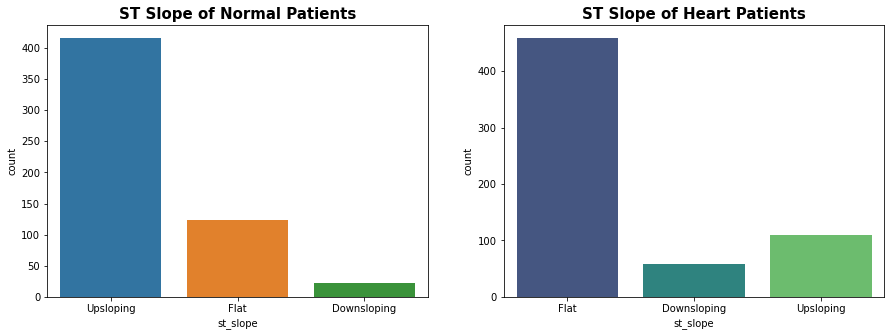

In [46]:
#Plotting normal patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST Slope of Normal Patients',fontsize=15,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'],palette='viridis')
plt.title("ST Slope of Heart Patients",fontsize=15,weight="bold")
plt.show()

In [47]:
#Exploring the Heart Disease Patients based on ST Slope
plot_criteria=['st_slope','target']
sns.light_palette('red',as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]],dt[plot_criteria[1]],normalize='columns')*100,2))

target,0,1
st_slope,,
Downsloping,3.92,9.39
Flat,21.93,73.09
Upsloping,74.15,17.52


## Distribution of Numerical Features

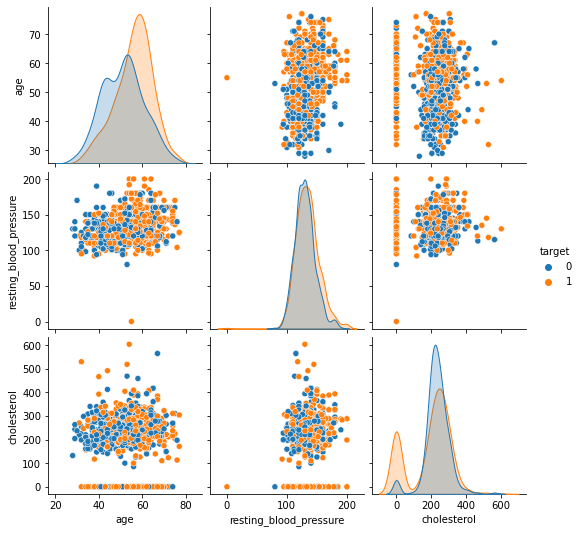

In [48]:
sns.pairplot(dt,hue='target',vars=['age','resting_blood_pressure','cholesterol'])

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

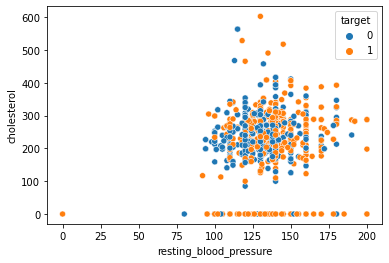

In [49]:
sns.scatterplot(x='resting_blood_pressure',y="cholesterol",hue='target',data=dt)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

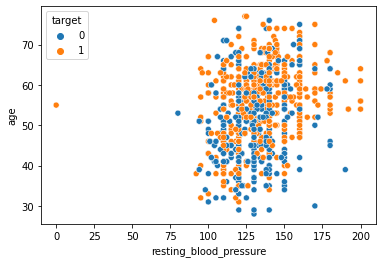

In [50]:
sns.scatterplot(x='resting_blood_pressure',y="age",hue='target',data=dt)

## Outlier Detection and Removal

In [51]:
'''z-score=((score or x)-mean)/Standard Deviation'''

'z-score=((score or x)-mean)/Standard Deviation'

In [52]:
#filtering numeric features as age, resting bp,cholesterol and max heart rate achieved has outliers
dt_numeric=dt[['age','resting_blood_pressure','cholesterol','Max_Heart_rate',]]

In [53]:
dt_numeric

,age,resting_blood_pressure,cholesterol,Max_Heart_rate
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122
...,...,...,...,...
1185,45,110,264,132
1186,68,144,193,141
1187,57,130,131,115
1188,57,130,236,174


In [54]:
#Calculating zscore of numeric columns in the dataset
z=np.abs(stats.zscore(dt_numeric))

In [55]:
print(z)

[[1.46626567 0.4281359  0.7752277  1.26430092]
 [0.5035987  1.51737007 0.29951621 0.63725935]
 [1.78715466 0.11648118 0.71606748 1.63576637]
 ...
 [0.35210527 0.11648118 0.78265797 0.96953469]
 [0.35210527 0.11648118 0.2526458  1.34268112]
 [1.68019167 0.31921249 0.34881639 1.30349102]]


In [56]:
# Defining threshold for filtering outliers
threshold=3
print(np.where(z>3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


In [57]:
# Filtering outliers retaining only those data points which are below threshold
dt=dt[(z<3).all(axis=1)]

In [58]:
dt.shape

(1172, 12)

In [59]:
## Encoding categorical variables
dt=pd.get_dummies(dt,drop_first=True)

In [60]:
dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,target,sex_Male,chest_pain_type_Non Anginal Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_ST-T wave abnormality,Resting_ecg_normal,st_slope_Flat,st_slope_Upsloping
0,40,140,289,0,172,0,0.0,0,1,0,0,1,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,1,0,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,0,0,1,1,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,1,0,0,0,1,0,1


In [61]:
# Segregating dataset into features i.e, X and Target variable i.e Y
X=dt.drop(['target'],axis=1)
y=dt['target']

In [62]:
X

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,sex_Male,chest_pain_type_Non Anginal Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_ST-T wave abnormality,Resting_ecg_normal,st_slope_Flat,st_slope_Upsloping
0,40,140,289,0,172,0,0.0,1,0,0,1,0,1,0,1
1,49,160,180,0,156,0,1.0,0,1,0,0,0,1,1,0
2,37,130,283,0,98,0,0.0,1,0,0,1,1,0,0,1
3,48,138,214,0,108,1,1.5,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,110,264,0,132,0,1.2,1,0,1,0,0,1,1,0
1186,68,144,193,1,141,0,3.4,1,0,0,0,0,1,1,0
1187,57,130,131,0,115,1,1.2,1,0,0,0,0,1,1,0
1188,57,130,236,0,174,0,0.0,0,0,0,1,0,0,1,0


In [63]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1172, dtype: int64

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

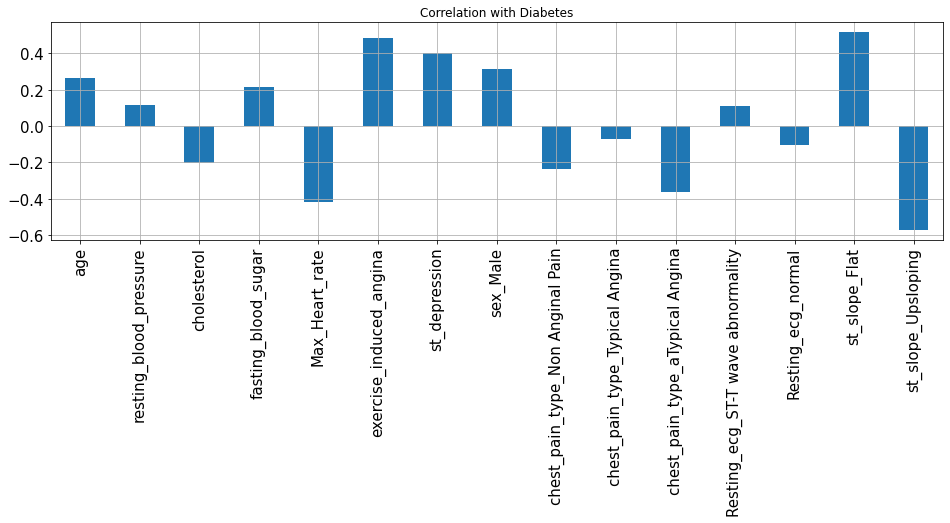

In [64]:
# Correlation with Response Variable Class
X.corrwith(y).plot.bar(figsize=(16,4),title="Correlation with Diabetes", fontsize=15
                      ,rot=90,grid=True)

## Train Test Split

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=101)

In [66]:
## Checking Distribution of target variable in train test split
print('Distribution of target variable in training set')
print(ytrain.value_counts())

Distribution of target variable in training set
1    489
0    448
Name: target, dtype: int64


In [67]:
## Checking Distribution of target variable in train test split
print('Distribution of target variable in test set')
print(ytest.value_counts())

Distribution of target variable in test set
1    125
0    110
Name: target, dtype: int64


In [68]:
print('*'*25,'Training Set','*'*25)
print(xtrain.shape)
print(ytrain.shape)

print('*'*25,'Testing Set','*'*25)
print(xtest.shape)
print(ytest.shape)


************************* Training Set *************************
(937, 15)
(937,)
************************* Testing Set *************************
(235, 15)
(235,)


## Feature Normalization
In this step we will normalize all the numeric feature in the range of 0 to 1

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler=MinMaxScaler()

In [71]:
xtrain[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']]

,age,resting_blood_pressure,cholesterol,Max_Heart_rate,st_depression
605,74,155,310,112,1.5
89,55,140,229,110,0.5
520,63,96,305,121,1.0
372,66,150,0,108,2.0
222,51,160,303,150,1.0
...,...,...,...,...,...
586,57,180,285,120,0.8
988,34,118,182,174,0.0
77,35,140,167,150,0.0
611,46,134,310,126,0.0


In [72]:
xtrain[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']]=scaler.fit_transform(xtrain[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']])

In [73]:
xtrain.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,sex_Male,chest_pain_type_Non Anginal Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_ST-T wave abnormality,Resting_ecg_normal,st_slope_Flat,st_slope_Upsloping
605,0.938776,0.714286,0.631365,0,0.333333,1,0.465909,1,0,0,0,0,1,0,0
89,0.551020,0.571429,0.466395,0,0.318519,1,0.352273,1,0,0,0,0,1,1,0
520,0.714286,0.152381,0.621181,0,0.400000,1,0.409091,1,0,0,0,1,0,0,1
372,0.775510,0.666667,0.000000,0,0.303704,1,0.522727,1,0,0,0,0,1,1,0
222,0.469388,0.761905,0.617108,0,0.614815,1,0.409091,0,0,0,0,0,1,1,0


In [74]:
xtrain[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']]

,age,resting_blood_pressure,cholesterol,Max_Heart_rate,st_depression
605,0.938776,0.714286,0.631365,0.333333,0.465909
89,0.551020,0.571429,0.466395,0.318519,0.352273
520,0.714286,0.152381,0.621181,0.400000,0.409091
372,0.775510,0.666667,0.000000,0.303704,0.522727
222,0.469388,0.761905,0.617108,0.614815,0.409091
...,...,...,...,...,...
586,0.591837,0.952381,0.580448,0.392593,0.386364
988,0.122449,0.361905,0.370672,0.792593,0.295455
77,0.142857,0.571429,0.340122,0.614815,0.295455
611,0.367347,0.514286,0.631365,0.437037,0.295455


In [75]:
xtest[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']]

,age,resting_blood_pressure,cholesterol,Max_Heart_rate,st_depression
897,57,140,192,148,0.4
392,70,115,0,92,0.0
942,54,124,266,109,2.2
982,52,128,255,161,0.0
2,37,130,283,98,0.0
...,...,...,...,...,...
332,56,115,0,82,-1.0
143,53,140,243,155,0.0
75,46,150,163,116,0.0
32,54,125,224,122,2.0


In [76]:
xtest[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']]=scaler.transform(xtest[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']])

In [77]:
xtest.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,sex_Male,chest_pain_type_Non Anginal Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_ST-T wave abnormality,Resting_ecg_normal,st_slope_Flat,st_slope_Upsloping
897,0.591837,0.571429,0.391039,0,0.600000,0,0.340909,1,0,0,0,0,1,1,0
392,0.857143,0.333333,0.000000,0,0.185185,1,0.295455,1,0,0,0,1,0,1,0
942,0.530612,0.419048,0.541752,0,0.311111,1,0.545455,1,0,0,0,0,0,1,0
982,0.489796,0.457143,0.519348,0,0.696296,1,0.295455,1,0,0,0,0,1,0,1
2,0.183673,0.476190,0.576375,0,0.229630,0,0.295455,1,0,0,1,1,0,0,1


## Cross Validation

In [78]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [79]:
# Function initializing baseline learning models
def GetBasedModel():
    basedmodels=[]
    basedmodels.append(('LR_L2',LogisticRegression(penalty='l2')))
    basedmodels.append(('LDA',LinearDiscriminantAnalysis()))
    basedmodels.append(('KNN7',KNeighborsClassifier(7)))
    basedmodels.append(('KNN5',KNeighborsClassifier(5)))
    basedmodels.append(('KNN9',KNeighborsClassifier(9)))
    basedmodels.append(('KNN11',KNeighborsClassifier(11)))
    basedmodels.append(('CART',DecisionTreeClassifier()))
    basedmodels.append(('NB',GaussianNB()))
    basedmodels.append(('SVM Linear',SVC(kernel='linear',gamma='auto',probability=True)))
    basedmodels.append(('SVM RBF',SVC(kernel='rbf',gamma='auto',probability=True)))
    basedmodels.append(('AB',AdaBoostClassifier()))
    basedmodels.append(('GBM',GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedmodels.append(('RF_Ent100',RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedmodels.append(('RF_Gini100',RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedmodels.append(('ET100',ExtraTreesClassifier(n_estimators=100)))
    basedmodels.append(('ET500',ExtraTreesClassifier(n_estimators=500)))
    basedmodels.append(('MLP',MLPClassifier()))
    basedmodels.append(('SGD3000',SGDClassifier(max_iter=1000,tol=1e-4)))
    basedmodels.append(('XGB2000',xgb.XGBClassifier(n_estimators=2000)))
    basedmodels.append(('XGB500',xgb.XGBClassifier(n_estimators=500)))
    basedmodels.append(('XGB100',xgb.XGBClassifier(n_estimators=100)))
    basedmodels.append(('XGB1000',xgb.XGBClassifier(n_estimators=1000)))
    basedmodels.append(('ET1000',ExtraTreesClassifier(n_estimators=1000)))

    return basedmodels

    
    

In [80]:
# Function for performing 10 fold cross validation of all the based models
def BaseLine2(xtrain,ytrain,models):
    # Test options and evaluation metric
    num_folds=10
    scoring='accuracy'
    seed=7
    results=[]
    names=[]
    for name,model in models:
        kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results=model_selection.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=scoring)
        results.append(name)
        msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
        print(msg)
    return results,msg

In [81]:
models=GetBasedModel()
names,results=BaseLine2(xtrain,ytrain,models)

LR_L2: 0.840883 (0.029018)
LDA: 0.840895 (0.026473)
KNN7: 0.839876 (0.033854)
KNN5: 0.846305 (0.022497)
KNN9: 0.838858 (0.029082)
KNN11: 0.835598 (0.033306)
CART: 0.853786 (0.022026)
NB: 0.829124 (0.028606)
SVM Linear: 0.844097 (0.029230)
SVM RBF: 0.838767 (0.032918)
AB: 0.853660 (0.038162)
GBM: 0.878254 (0.035440)
RF_Ent100: 0.908156 (0.033337)
RF_Gini100: 0.915626 (0.034428)
ET100: 0.911359 (0.025955)
ET500: 0.911382 (0.034217)
MLP: 0.847369 (0.033507)
SGD3000: 0.801418 (0.053156)
[20:03:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:4

[20:04:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

## Model Building

### Random Forest Classifier(Criterion= 'entropy')

In [82]:
rf_ent=RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy')

In [83]:
y_pred_rfe=rf_ent.predict(xtest)

In [84]:
y_pred_rfe

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

## Multi Layer Perceptron

In [85]:
mlp=MLPClassifier()

In [86]:
mlp.fit(xtrain,ytrain)

MLPClassifier()

In [87]:
y_pred_mlp=mlp.predict(xtest)

In [88]:
y_pred_mlp

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

## K Nearest Neighbour (n=9)

In [89]:
knn=KNeighborsClassifier(9)

In [90]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [91]:
y_pred_knn=knn.predict(xtest)

In [92]:
y_pred_knn

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

## Extra Tree Classifier (n_estimator=100)

In [93]:
et_100=ExtraTreesClassifier(n_estimators=100)
et_100.fit(xtrain,ytrain)
y_pred_et_100=et_100.predict(xtest)

In [94]:
y_pred_et_100

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

## XGBoost(n_estimators=500)

In [95]:
Xgb=xgb.XGBClassifier(n_estimators=500)

In [96]:
Xgb.fit(xtrain,ytrain)

[20:04:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
y_pred_xgb=Xgb.predict(xtest)

In [98]:
y_pred_xgb

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

## Support Vector Classifier (kernel='linear')

In [99]:
svc=SVC(kernel='linear',gamma='auto',probability=True)

In [100]:
svc.fit(xtrain,ytrain)

SVC(gamma='auto', kernel='linear', probability=True)

In [101]:
y_pred_svc=svc.predict(xtest)

In [102]:
y_pred_svc

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

## Stochastic Gradient Descent

In [103]:
sgd=SGDClassifier(max_iter=1000,tol=1e-4)

In [104]:
sgd.fit(xtrain,ytrain)

SGDClassifier(tol=0.0001)

In [105]:
y_pred_sgd=sgd.predict(xtest)

In [106]:
y_pred_sgd

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

## AdaBoost Classifier

In [107]:
ada=AdaBoostClassifier()

In [108]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [109]:
y_pred_ada=ada.predict(xtest)

In [110]:
y_pred_ada

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

## Decision Tree Classifier (CART)

In [111]:
decc=DecisionTreeClassifier()

In [112]:
decc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [113]:
y_pred_decc=decc.predict(xtest)

In [114]:
y_pred_decc

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

## Gradient Boosting Machine

In [115]:
gbm=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')

In [116]:
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(max_features='sqrt')

In [117]:
y_pred_gbm=gbm.predict(xtest)

In [118]:
y_pred_gbm

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

## Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log Loss,Mathew
0,Random Forest,0.944681,0.930769,0.968,0.918182,0.94902,0.943091,1.910686,0.889422


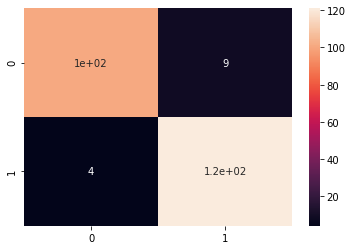

In [119]:
cm=confusion_matrix(ytest,y_pred_rfe)
sns.heatmap(cm,annot=True)
TN=cm[0][0]
FN=cm[1][0]
TP=cm[1][1]
FP=cm[0][1]
specificity=TN/(TN+FP)
loss_log=log_loss(ytest,y_pred_rfe)
acc=accuracy_score(ytest,y_pred_rfe)
roc=roc_auc_score(ytest,y_pred_rfe)
prec=precision_score(ytest,y_pred_rfe)
rec=recall_score(ytest,y_pred_rfe)
f1=f1_score(ytest,y_pred_rfe)

mathew=matthews_corrcoef(ytest,y_pred_rfe)
model_results=pd.DataFrame([['Random Forest',acc,prec,rec,specificity,f1,roc,loss_log,mathew]],
                          columns=['Model','Accuracy','Precision','Sensitivity','Specificity','F1 Score','ROC','Log Loss','Mathew'])
model_results

## Comparison with other Models

In [120]:
data={'MLP':y_pred_mlp,
     'KNN':y_pred_knn,
     'Extra Tree Classifier':y_pred_et_100,
     'XGB':y_pred_xgb,
     'SVC':y_pred_svc,
     'SGD':y_pred_sgd,
     'AdaBoost':y_pred_ada,
     'CART':y_pred_decc,
     'GBM':y_pred_gbm}

models=pd.DataFrame(data)

for column in models:
    cm=confusion_matrix(ytest,models[column])
    TN=cm[0][0]
    FN=cm[1][0]
    TP=cm[1][1]
    FP=cm[0][1]
    specificity=TN/(TN+FP)
    loss_log=log_loss(ytest,models[column])
    acc=accuracy_score(ytest,models[column])
    roc=roc_auc_score(ytest,models[column])
    prec=precision_score(ytest,models[column])
    rec=recall_score(ytest,models[column])
    f1=f1_score(ytest,models[column])
    
    
    mathew=matthews_corrcoef(ytest,models[column])
    results=pd.DataFrame([[column,acc,prec,rec,specificity,f1,roc,loss_log,mathew]],
                          columns=['Model','Accuracy','Precision','Sensitivity','Specificity','F1 Score','ROC','Log Loss','Mathew'])
    model_results=model_results.append(results,ignore_index=True)
model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log Loss,Mathew
0,Random Forest,0.944681,0.930769,0.968,0.918182,0.949020,0.943091,1.910686,0.889422
1,MLP,0.889362,0.883721,0.912,0.863636,0.897638,0.887818,3.821362,0.777789
2,KNN,0.868085,0.840580,0.928,0.800000,0.882129,0.864000,4.556254,0.737832
3,Extra Tree Classifier,0.944681,0.930769,0.968,0.918182,0.949020,0.943091,1.910686,0.889422
4,XGB,0.948936,0.944882,0.960,0.936364,0.952381,0.948182,1.763706,0.897474
5,SVC,0.872340,0.862595,0.904,0.836364,0.882813,0.870182,4.409267,0.743779
6,SGD,0.876596,0.852941,0.928,0.818182,0.888889,0.873091,4.262300,0.754065
7,AdaBoost,0.863830,0.854962,0.896,0.827273,0.875000,0.861636,4.703217,0.726610
8,CART,0.876596,0.928571,0.832,0.927273,0.877637,0.879636,4.262259,0.758556
9,GBM,0.902128,0.886364,0.936,0.863636,0.910506,0.899818,3.380442,0.804152


## ROC AUC Curve

Text(0.5, 1.0, 'Receiver Operator Characteristic curves')

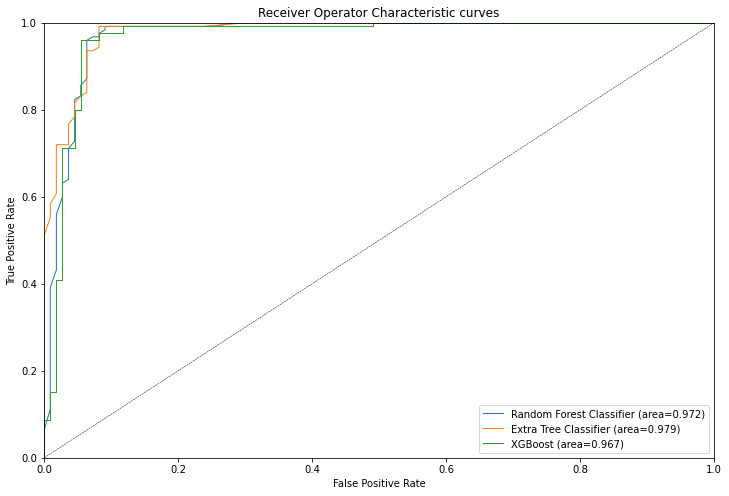

In [121]:
def roc_auc_plot(ytrue,yproba,label=' ',l='-',lw=1.0):
    from sklearn.metrics import roc_curve,roc_auc_score
    fpr,tpr,_=roc_curve(ytrue,yproba[:,1])
    ax.plot(fpr,tpr,linestyle=l,linewidth=lw,label="%s (area=%.3f)"%(label,roc_auc_score(ytrue,yproba[:,1])))

f,ax=plt.subplots(figsize=(12,8))
roc_auc_plot(ytest,rf_ent.predict_proba(xtest),label='Random Forest Classifier',l='-')
roc_auc_plot(ytest,et_100.predict_proba(xtest),label='Extra Tree Classifier',l='-')
roc_auc_plot(ytest,Xgb.predict_proba(xtest),label='XGBoost',l='-')
ax.plot([0,1],[0,1],color='k',linewidth=0.5,linestyle='--')
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('Receiver Operator Characteristic curves')

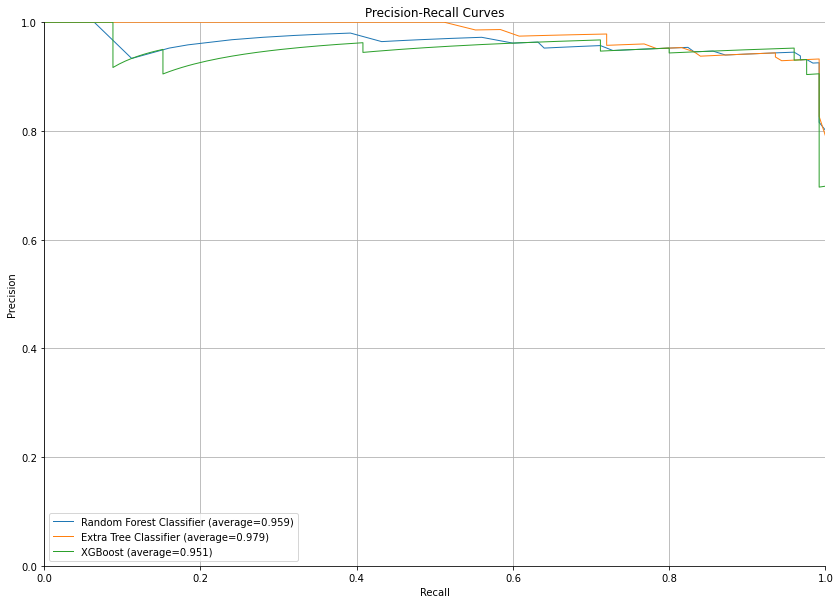

In [122]:
def precision_recall_plot(ytrue,yproba,label=" ",l='-',lw=1.0):
    from sklearn.metrics import precision_recall_curve,average_precision_score
    precision,recall,_=precision_recall_curve(ytest,yproba[:,1])
    average_precision=average_precision_score(ytest,yproba[:,1])
    ax.plot(recall,precision,label="%s (average=%.3f)"%(label,average_precision),
            linestyle=l,linewidth=lw)
f,ax=plt.subplots(figsize=(14,10))
precision_recall_plot(ytest,rf_ent.predict_proba(xtest),label='Random Forest Classifier',l='-')
precision_recall_plot(ytest,et_100.predict_proba(xtest),label='Extra Tree Classifier',l='-')
precision_recall_plot(ytest,Xgb.predict_proba(xtest),label='XGBoost',l='-')

ax.legend(loc='lower left')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xlim([0,1])
ax.grid(True)
ax.set_ylim([0,1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Feature Selection

In [127]:
num_feats=11
def cor_selector(X,y,num_feats):
    cor_list=[]
    feature_name=X.columns.tolist()
    #Calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor=np.corrcoef(X[i],y)[0,1]
        cor_list.append(cor)
    #Replace NaN with 0
    cor_list=[0 if np.isnan(i) else i for i in cor_list]
    #feature name
    cor_feature=X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    #feature Selection? 0 for not select, 1 for select
    cor_support=[True if i in cor_feature else False for i in feature_name]
    return cor_support,cor_feature
cor_support,cor_feature=cor_selector(X,y,num_feats)
print(str(len(cor_feature)),'selected features')

11 selected features


In [129]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [130]:
X_norm=MinMaxScaler().fit_transform(X)

In [131]:
chi_selector=SelectKBest(chi2,k=num_feats)

In [132]:
chi_selector.fit(X_norm,y)

SelectKBest(k=11, score_func=<function chi2 at 0x7f320811c830>)

In [133]:
chi_support=chi_selector.get_support()


In [134]:
chi_feature=X.loc[:,chi_support].columns.tolist()

In [135]:
print(str(len(chi_feature)),'selected features')

11 selected features


In [136]:
from sklearn.feature_selection import RFE

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
rfe_selector=RFE(estimator=LogisticRegression(),n_features_to_select=num_feats,
                step=10,verbose=5)

In [142]:
rfe_selector.fit(X_norm,y)

Fitting estimator with 15 features.


RFE(estimator=LogisticRegression(), n_features_to_select=11, step=10, verbose=5)

In [143]:
rfe_support =rfe_selector.get_support()

In [145]:
rfe_feature=X.loc[:,rfe_support].columns.tolist()

In [146]:
print(str(len(rfe_feature)),'selected features')

11 selected features


In [147]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [148]:
embeded_lr_selector=SelectFromModel(LogisticRegression(penalty='l2',solver='lbfgs'),max_features=num_feats)

In [149]:
embeded_lr_selector.fit(X_norm,y)

SelectFromModel(estimator=LogisticRegression(), max_features=11)

In [150]:
embeded_lr_support=embeded_lr_selector.get_support()

In [151]:
embeded_lr_feature=X.loc[:,embeded_lr_support].columns.tolist()


In [152]:
print(str(len(embeded_lr_feature)),'selected features')

6 selected features


In [155]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector=SelectFromModel(RandomForestClassifier(n_estimators=100,criterion='gini'),max_features=num_feats)
embeded_rf_selector.fit(X,y)
embeded_rf_support=embeded_rf_selector.get_support()
embeded_rf_feature=X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)),'selected features')

8 selected features


In [157]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500,learning_rate=0.05,num_leaves=32,colsample_bytree=0.2,
                   reg_alpha=3,reg_lambda=1,min_split_gain=0.01,min_child_weight=40)
embeded_lgbc_selector=SelectFromModel(lgbc,max_features=num_feats)
embeded_lgbc_selector.fit(X,y)
embeded_lgbc_support=embeded_lgbc_selector.get_support()
embeded_lgbc_feature=X.loc[:,embeded_lgbc_support].columns.tolist()
print(str(len(embeded_lgbc_feature)),'selected features')

7 selected features


In [160]:
#put all selection together
feature_name=X.columns
feature_selection_df=pd.DataFrame({'Feature':feature_name,'Pearson':cor_support,'Chi-2':chi_support,'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                  'Random Forest':embeded_rf_support,'LightGBM':embeded_lgbc_support})

In [161]:
#count the selected times for each feature
feature_selection_df['total']=np.sum(feature_selection_df,axis=1)

In [164]:
#Display the top 100
feature_selection_df=feature_selection_df.sort_values(['total','Feature'],ascending=False)
feature_selection_df.index=range(1,len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,total
1,st_depression,True,True,True,True,True,True,6
2,st_slope_Flat,True,True,True,False,True,True,5
3,exercise_induced_angina,True,True,True,False,True,True,5
4,cholesterol,True,False,True,True,True,True,5
5,Max_Heart_rate,True,True,True,False,True,True,5
6,st_slope_Upsloping,True,True,True,False,True,False,4
7,sex_Male,True,True,True,True,False,False,4
8,chest_pain_type_aTypical Angina,True,True,True,True,False,False,4
9,chest_pain_type_Non Anginal Pain,True,True,True,True,False,False,4
10,age,True,False,True,False,True,True,4


In [ ]:
#